In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

LASSOData = pd.read_csv('Data/LASSO-data-set.csv')
LASSOData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   strength      1000 non-null   int64  
 1   dexterity     1000 non-null   int64  
 2   constitution  1000 non-null   int64  
 3   wisdom        1000 non-null   int64  
 4   intelligence  1000 non-null   int64  
 5   charisma      1000 non-null   int64  
 6   weight        1000 non-null   int64  
 7   height        1000 non-null   int64  
 8   modifier1     1000 non-null   int64  
 9   modifier2     1000 non-null   int64  
 10  modifier3     1000 non-null   int64  
 11  modifier4     1000 non-null   int64  
 12  modifier5     1000 non-null   int64  
 13  modifier6     1000 non-null   int64  
 14  modifier7     1000 non-null   int64  
 15  modifier8     1000 non-null   int64  
 16  score         1000 non-null   float64
dtypes: float64(1), int64(16)
memory usage: 132.9 KB


In [4]:
# seperate the dependent variable out
X = LASSOData.drop('score', axis=1)
print(X.info())

y = LASSOData['score']
print(y.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   strength      1000 non-null   int64
 1   dexterity     1000 non-null   int64
 2   constitution  1000 non-null   int64
 3   wisdom        1000 non-null   int64
 4   intelligence  1000 non-null   int64
 5   charisma      1000 non-null   int64
 6   weight        1000 non-null   int64
 7   height        1000 non-null   int64
 8   modifier1     1000 non-null   int64
 9   modifier2     1000 non-null   int64
 10  modifier3     1000 non-null   int64
 11  modifier4     1000 non-null   int64
 12  modifier5     1000 non-null   int64
 13  modifier6     1000 non-null   int64
 14  modifier7     1000 non-null   int64
 15  modifier8     1000 non-null   int64
dtypes: int64(16)
memory usage: 125.1 KB
None
0    652.566513
1    413.145270
2    510.830805
3    392.261796
4    472.258696
Name: score, dtype: float64


In [5]:
# Create testing and training sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)


In [10]:
# Train the model
from sklearn.linear_model import LassoCV
reg = LassoCV().fit(X_train, y_train)


In [11]:
predictions_test = reg.predict(X_test)
residuals_test = predictions_test - y_test

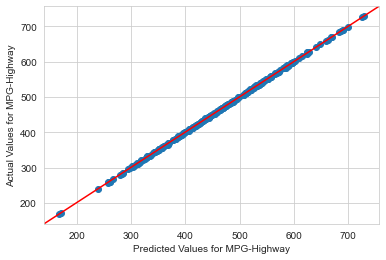

In [12]:
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='red')
ax.scatter(x=predictions_test, y=y_test, )
""" ax.set_xlim(18, 37)
ax.set_ylim(18, 37) """
ax.set_xlabel('Predicted Values for Score')
ax.set_ylabel('Actual Values for Score')
plt.show()


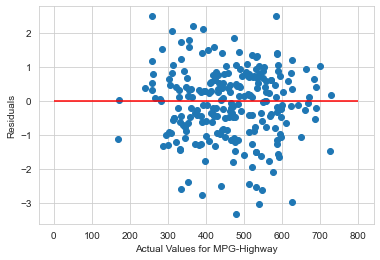

In [15]:
# Display the residuals versus the actual values
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.scatter(x=y_test, y=residuals_test)
ax.hlines(0, 0, 800, color='red')
""" ax.set_xlim(18, 37)
ax.set_ylim(18, 37) """
ax.set_xlabel('Actual Values for Score')
ax.set_ylabel('Residuals')
plt.show()


In [18]:
# Check the model fit
from sklearn.metrics import median_absolute_error

print(f"R2 = {round(reg.score(X_test, y_test),4)}")
print(
    f"Median Abs Error = {round(median_absolute_error(y_test, predictions_test),4)}")


R2 = 0.9999
Median Abs Error = 0.6513


In [19]:
# Get the model coefficients
coeffs = reg.coef_
print(len(coeffs))
columns = X_train.columns
string = f"y = {round(reg.intercept_,4)}"
for idx, coeff in enumerate(coeffs):
    string += f" + {round(coeff,4)}*{columns[idx]}"
print(string)
print(f"There are {(coeffs == 0).sum()} coefficients that equal zero")


16
y = -66.2292 + 0.0*strength + -0.0007*dexterity + -0.0*constitution + 0.0*wisdom + 0.0*intelligence + -0.0054*charisma + 3.9796*weight + -4.9927*height + 0.0*modifier1 + 0.0*modifier2 + 0.0199*modifier3 + 5.9776*modifier4 + -0.0*modifier5 + -0.0061*modifier6 + -0.0*modifier7 + -6.8683*modifier8
There are 8 coefficients that equal zero
